<a href="https://colab.research.google.com/github/irynadunets/Short-Course-2024-2025-CMM560---Computer-Vision-for-the-Energy-Sector---Summer/blob/main/Copy_of_CMM560_T6_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computing Vision - Shortskills

## Credit: Luis Toral Quijas

### Clone Github

In [ ]:
!git clone https://github.com/Luistoq/Computing-Vision---Shortskills-Course.git

Cloning into 'Computing-Vision---Shortskills-Course'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 50 (delta 19), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (50/50), 5.48 MiB | 7.02 MiB/s, done.
Resolving deltas: 100% (19/19), done.


In [ ]:
%cd Computing-Vision---Shortskills-Course

/content/Computing-Vision---Shortskills-Course


In [ ]:
# Provides a way to interact with the operating system
import os

# OpenCV library for computer vision and image processing
import cv2

# Provides support for numerical computations in Python
import numpy as np

# Plotting library for creating visualizations
from matplotlib import pyplot as plt

# Feature detection and extraction module of the scikit-image library
import skimage.feature as skf

# Scikit-image library for image processing
from skimage import data


### Check Directory

In [ ]:
current_dir = os.getcwd()
print("Current directory:", current_dir)

Current directory: /content/Computing-Vision---Shortskills-Course


## Basic Image operations

### Load and Display an Image.

Loading an image is the first step in any image processing task. Images can be read from files or acquired from cameras or other sensors.

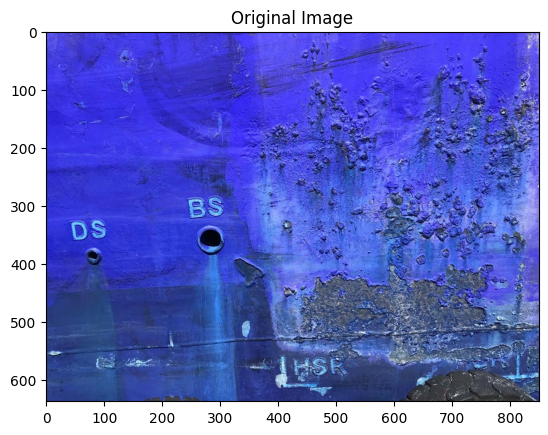

In [ ]:
# Load the image
img_path = 'images/img3.jpg'
img = cv2.imread(img_path)

# Display the original image
plt.imshow(img)
plt.title("Original Image")
plt.show()


### Resize the image.

Resizing an image can be useful for a variety of reasons. One common reason is to reduce the computational complexity of image processing algorithms. Large images require more processing time and memory, which can be a bottleneck in some applications. By resizing the image to a smaller size, the processing time and memory requirements can be reduced, allowing for faster and more efficient processing. Additionally, resizing can also be used to normalize the size of images in a dataset, which can be important for training machine learning models that require images of a consistent size.

args:

1. img: The input image data to be resized.
2. (0, 0): A tuple specifying the desired size of the output image. The (0, 0) value indicates that the size of the output image is computed automatically based on the scaling factors fx and fy.
3. fx: The scaling factor to be applied to the width of the input image. In this case, fx is set to 0.5, which means that the width of the output image will be half the width of the input image.
4. fy: The scaling factor to be applied to the height of the input image. In this case, fy is also set to 0.5, which means that the height of the output image will be half the height of the input image.

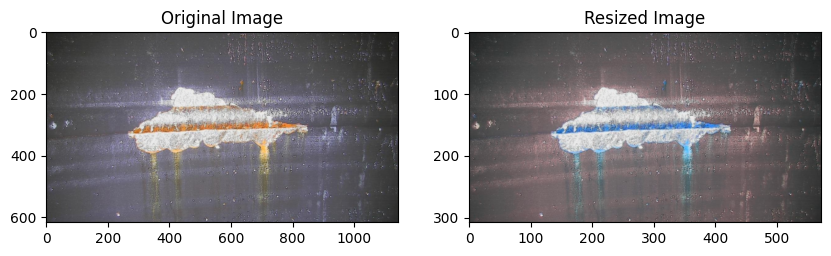

In [ ]:
# Load the image
img_path = 'images/img2.jpg'
img = cv2.imread(img_path)

# Resize the image to half its size
img_resized = cv2.resize(img, (0, 0), fx=0.5, fy=0.5)

# Display the original and thresholded images side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.set_title("Original Image")

ax2.imshow(img_resized, cmap='gray')
ax2.set_title("Resized Image")

plt.show()

### Convert to Grayscale.

Grayscale conversion is the process of converting an image from RGB (Red-Green-Blue) color space to a single channel grayscale image. Grayscale images are easier to process and require less storage space.

args:

1. img: The input image data to be converted to grayscale.
2. cv2.COLOR_BGR2GRAY: The color conversion code to be used for converting the input image from the BGR color space to grayscale.

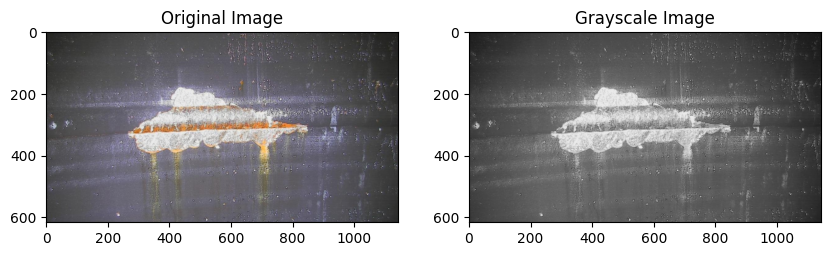

In [ ]:
# Load the image
img_path = 'images/img2.jpg'
img = cv2.imread(img_path)

# Convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Display the original and thresholded images side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.set_title("Original Image")

ax2.imshow(gray_img, cmap='gray')
ax2.set_title("Grayscale Image")

plt.show()

## Image Pre-Processing

### Edge detection.

Edge detection is a technique used to extract the boundaries of objects in an image. The Canny edge detection algorithm used in this code detects edges by looking for areas in the image where there is a rapid change in pixel intensity.

args:

1. gray_img: The input grayscale image data to be processed.
2. 100: The lower threshold value for edge detection. This is the minimum gradient value at a pixel that is required for it to be considered as an edge.
3. 200: The upper threshold value for edge detection. This is the maximum gradient value at a pixel that is required for it to be considered as an edge.


The cv2.Canny function applies the Canny edge detection algorithm to the input grayscale image using the specified lower and upper threshold values. The resulting binary image containing the detected edges is stored in the variable edges.


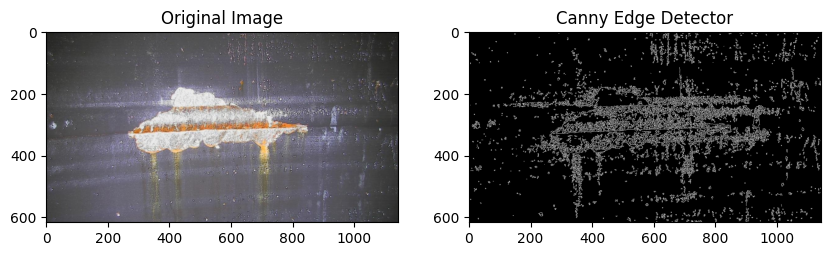

In [ ]:
# Load the image
img_path = 'images/img2.jpg'
img = cv2.imread(img_path)

# Convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Apply Edge detector
edges = cv2.Canny(gray_img, 100, 200)

# Display the original and thresholded images side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.set_title("Original Image")

ax2.imshow(edges, cmap='gray')
ax2.set_title("Canny Edge Detector")

plt.show()


### Smoothing.

Image smoothing, also known as blurring or low-pass filtering, is a technique used to reduce noise and detail in an image. The basic idea is to replace the pixel values in the image with an average of the pixel values in its neighborhood. There are various smoothing filters available, such as the mean filter, median filter, and Gaussian filter. Gaussian blur is a widely used smoothing filter that uses a weighted average of pixel values in a circular region around the target pixel, with the weights given by the Gaussian function. The advantage of Gaussian blur over other smoothing filters is that it preserves edges and sharp transitions in the image while reducing noise and detail. This makes it a popular choice for a wide range of image processing tasks, such as feature detection, segmentation, and object recognition.

args:

1. gray_img: The input grayscale image data to be blurred.
2. (5, 5): The size of the Gaussian kernel to be used for blurring. This is specified as a tuple of two odd integers, where each integer represents the size of the kernel in the x and y directions, respectively. In this case, a 5x5 kernel is used.
3. 0: The standard deviation of the Gaussian kernel in the x direction. If set to 0, the value is computed based on the kernel size (5, 5).

The cv2.GaussianBlur function applies a Gaussian blur to the input grayscale image using the specified kernel size and standard deviation. The resulting blurred image is stored in the variable blur.

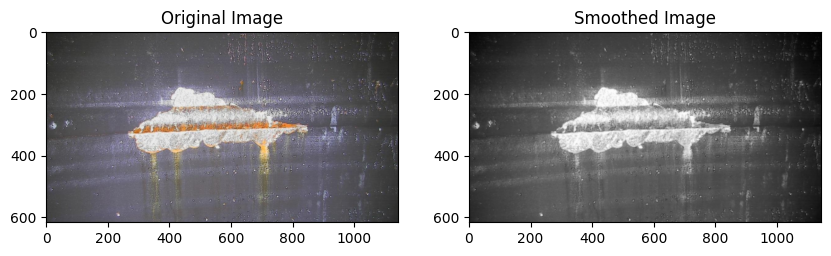

In [ ]:
# Load the image
img_path = 'images/img2.jpg'
img = cv2.imread(img_path)

# Convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Apply Gaussian filter
blur = cv2.GaussianBlur(gray_img, (5, 5), 0)

# Display the original and thresholded images side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.set_title("Original Image")

ax2.imshow(blur, cmap='gray')
ax2.set_title("Smoothed Image")

plt.show()


## Thresholding.

Image thresholding is a technique used to separate an image into two parts based on pixel intensity. Pixels with intensity above a certain threshold are set to one value, while pixels below the threshold are set to another value. In this code, binary thresholding is used to separate the foreground and background of an image.

args:

1. gray_img: The input grayscale image data to be thresholded.
2. 127: The threshold value to be used for thresholding the input image. Any pixel value below this threshold is set to 0, and any pixel value above this threshold is set to a maximum value of 255.
3. 255: The maximum value to which the pixel values above the threshold will be set.
4. cv2.THRESH_BINARY: The thresholding method to be used. This specifies that a fixed-level thresholding method should be used, where any pixel value below the threshold is set to 0, and any pixel value above the threshold is set to the specified maximum value (255 in this case).

The cv2.threshold function applies the specified thresholding method to the input grayscale image using the specified threshold value and maximum value. The resulting thresholded image data is returned as the second value in the tuple, while the computed threshold value is returned as the first value (which is stored in the ret variable in the code snippet).

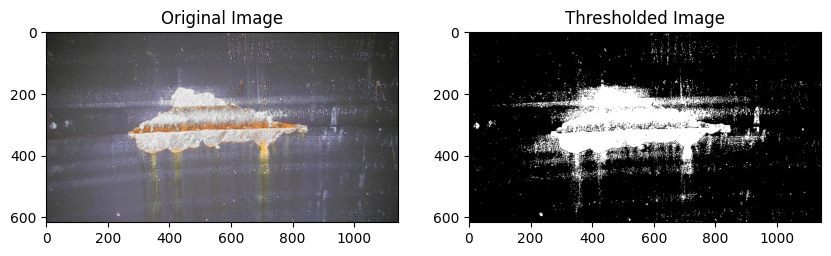

In [ ]:
# Load the image
img_path = 'images/img2.jpg'
img = cv2.imread(img_path)

# Convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Apply threshold
ret, thresh = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY)

# Display the original and thresholded images side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.set_title("Original Image")

ax2.imshow(thresh, cmap='gray')
ax2.set_title("Thresholded Image")

plt.show()

### Otsu
The main difference between cv2.THRESH_BINARY and OTSU thresholding is the way the threshold value is determined. With cv2.THRESH_BINARY, a threshold value is manually chosen and applied to the image. In contrast, Otsu thresholding automatically calculates an optimal threshold value based on the image histogram, with the aim of minimizing the variance within each of the resulting binary image classes. Notice that if the image histogram is not bimodal, or the image has poor contrast, the Otsu threshold may not be optimal, and a manual threshold (such as cv2.THRESH_BINARY) may be a better choice.

args:

1. gray_img: This is the input grayscale image that needs to be thresholded.
2. 0: This is the threshold value used to segment the image. In this case, a value of 0 is used as it will be automatically determined by the Otsu's algorithm.
3. 255: This is the maximum value that can be assigned to pixels in the output binary image.
4. cv2.THRESH_BINARY+cv2.THRESH_OTSU: These are two flags that are combined using the "+" operator to specify the thresholding method. The cv2.THRESH_BINARY flag indicates that pixels with values above the threshold will be set to the maximum value, while those below it will be set to zero. The cv2.THRESH_OTSU flag tells the function to use the Otsu's algorithm to automatically determine the threshold value based on the image histogram.

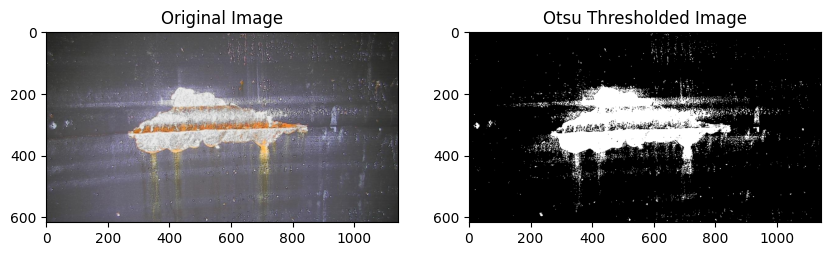

In [ ]:
# Load the image
img_path = 'images/img2.jpg'
img = cv2.imread(img_path)

# Convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Otsu's thresholding to create a binary image
ret, thresh_img = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Display the original and thresholded images side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.set_title("Original Image")

ax2.imshow(thresh_img, cmap='gray')
ax2.set_title("Otsu Thresholded Image")

plt.show()

## Morphological Operations.

Morphological operations are a set of mathematical operations that are used to process images in order to extract features, remove noise, or enhance the visual appearance of an image. These operations are based on the use of a "structuring element," which is a small binary image that is used to scan the input image. The structuring element is moved over the input image, and for each pixel, the values of the pixels within the neighborhood defined by the structuring element are combined to produce a new output value. The most common morphological operations are erosion, dilation, opening, closing, and morphological gradient, each of which has specific uses and applications in image processing. These operations are widely used in fields such as computer vision, medical imaging, and remote sensing.

### Erosion

Erosion is a morphological operator that is used to remove small details and boundaries of objects in an image. It works by moving a small "structuring element" over the image and replacing each pixel with the minimum value of the pixels in the neighborhood defined by the structuring element. This causes the boundaries of objects to erode away, making them smaller and smoother. Erosion is often used as a pre-processing step in image analysis and can be used to remove noise, separate overlapping objects, or extract important features from an image.

args:

1. thresh: This is the input binary image that needs to be eroded.
2. kernel: This is the structuring element used for the erosion operation. It defines the shape and size of the neighborhood over which the erosion is performed.
3. iterations=1: This is an optional parameter that specifies the number of times the erosion operation should be applied. In this case, a value of 1 is used, which means the erosion operation will be applied once.



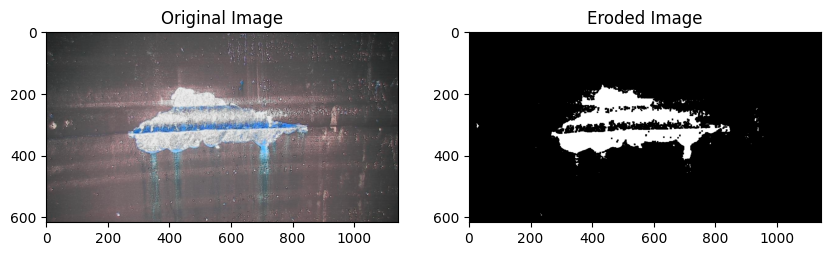

In [ ]:
# Load the image
img_path = 'images/img2.jpg'
img = cv2.imread(img_path)

# Convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply thresholding to create a binary image
ret, thresh = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY)

# Define the structuring element for erosion
kernel = np.ones((5, 5), np.uint8)

# Apply erosion
erosion = cv2.erode(thresh, kernel, iterations=1)

# Display the original and eroded images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(img, cmap='gray')
ax1.set_title("Original Image")

ax2.imshow(erosion, cmap='gray')
ax2.set_title("Eroded Image")

plt.show()

### Dilation

Dilation is another morphological operator in image processing that is the opposite of erosion. Instead of shrinking the boundaries of objects, dilation expands them by replacing each pixel with the maximum value of the pixels in the neighborhood defined by the structuring element. This causes objects to grow and merge together, filling in small gaps and smoothing out the edges. Like erosion, dilation is often used as a pre-processing step in image analysis and can be used to join broken lines, connect disjoint objects, or highlight important features in an image.

args:

1. thresh_img: This is the input binary image that needs to be dilated.
2. kernel: This is the structuring element used for the dilation operation. It defines the shape and size of the neighborhood over which the dilation is performed.
3. iterations=1: This is an optional parameter that specifies the number of times the dilation operation should be applied. In this case, a value of 1 is used, which means the dilation operation will be applied once.

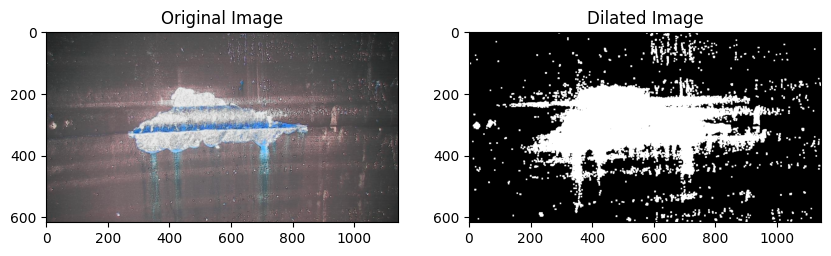

In [ ]:
# Load the image
img_path = 'images/img2.jpg'
img = cv2.imread(img_path)

# Convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply thresholding to create a binary image
ret, thresh_img = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Apply dilation
kernel = np.ones((5,5),np.uint8)
dilated_img = cv2.dilate(thresh_img, kernel, iterations=1)

# Display the original and the dilated image
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(img, cmap='gray')
ax1.set_title("Original Image")

ax2.imshow(dilated_img, cmap='gray')
ax2.set_title("Dilated Image")

plt.show()


## Opening

Opening is a morphological operation that is formed by applying an erosion operation followed by a dilation operation on an image. The overall effect of the opening operation is to remove small objects and smooth the edges of larger objects in the image. Opening can be used to remove noise, separate overlapping objects, or enhance important features in an image. It is often used as a pre-processing step before more complex operations, such as object detection or segmentation.

args:

1. thresh_img: This is the input binary image that needs to be processed using morphological operations.
2. cv2.MORPH_OPEN: This is the morphological operation that needs to be applied to the input image. In this case, the MORPH_OPEN operation is used, which is a combination of an erosion operation followed by a dilation operation. The MORPH_OPEN operation is useful for removing small bright regions in the image while preserving the larger ones.
3. kernel: This is the structuring element used for the morphological operation. It defines the shape and size of the neighborhood over which the morphological operation is performed.

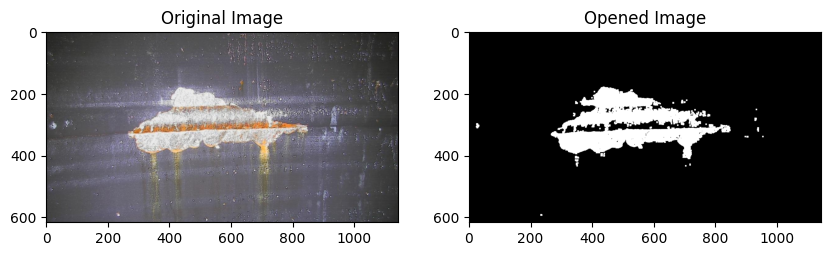

In [ ]:
# Load the image
img_path = 'images/img2.jpg'
img = cv2.imread(img_path)

# Convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply thresholding to create a binary image
ret, thresh_img = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Perform opening operation to clean up the image
kernel = np.ones((5,5),np.uint8)
opening = cv2.morphologyEx(thresh_img, cv2.MORPH_OPEN, kernel)

# Display the original and opened images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.set_title("Original Image")

ax2.imshow(opening, cmap='gray')
ax2.set_title("Opened Image")

plt.show()


## Closing

Closing is a morphological operation that is formed by applying a dilation operation followed by an erosion operation on an image. The overall effect of the closing operation is to fill in gaps between objects and join nearby objects together. Closing can be used to remove small holes, connect broken lines, or remove isolated objects in an image. It is often used as a pre-processing step before more complex operations, such as object detection or segmentation.

args:

1. thresh_img: This is the input binary image that needs to be processed using morphological operations.
2. cv2.MORPH_CLOSE: This is the morphological operation that needs to be applied to the input image. In this case, the MORPH_CLOSE operation is used, which is a combination of a dilation operation followed by an erosion operation. The MORPH_CLOSE operation is useful for closing small gaps between bright regions in the image and filling in small holes inside the bright regions.
3. kernel: This is the structuring element used for the morphological operation. It defines the shape and size of the neighborhood over which the morphological operation is performed.

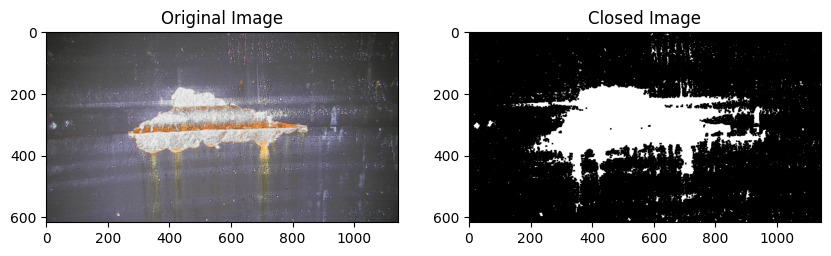

In [ ]:
# Load the image
img_path = 'images/img2.jpg'
img = cv2.imread(img_path)

# Convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply thresholding to create a binary image
ret, thresh_img = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Perform closing to fill in small gaps
kernel = np.ones((5,5), np.uint8)
closing = cv2.morphologyEx(thresh_img, cv2.MORPH_CLOSE, kernel)

# Display the original and processed images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.set_title("Original Image")

ax2.imshow(closing, cmap='gray')
ax2.set_title("Closed Image")

plt.show()


### Morphological gradient

Morphological gradient is a morphological operator that is formed by subtracting the result of an erosion operation from the result of a dilation operation on an image. The resulting image highlights the boundaries of objects in the original image, showing where the intensity changes the most. The morphological gradient can be used to extract the edges of objects, as well as to enhance the contrast between objects and their surroundings. It can also be used to detect the locations of objects that have a specific shape or size. The morphological gradient is a useful tool in image processing and is often used as a pre-processing step before more complex operations, such as object detection or segmentation.


args:
1. thresh_img: This is the input binary image that needs to be processed using morphological operations.
2. cv2.MORPH_GRADIENT: This is the morphological operation that needs to be applied to the input image. In this case, the MORPH_GRADIENT operation is used, which is a combination of a dilation and an erosion operation. The MORPH_GRADIENT operation is useful for highlighting the boundaries of bright regions in the image.
3. kernel: This is the structuring element used for the morphological operation. It defines the shape and size of the neighborhood over which the morphological operation is performed.

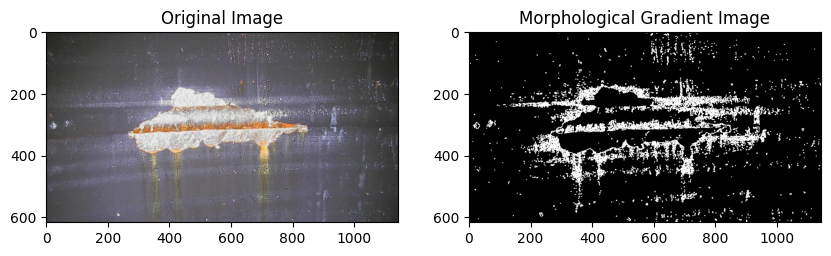

In [ ]:
# Load the image
img_path = 'images/img2.jpg'
img = cv2.imread(img_path)

# Convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply thresholding to create a binary image
ret, thresh_img = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Perform morphological operations to create the morphological gradient
kernel = np.ones((3, 3), np.uint8)
gradient_img = cv2.morphologyEx(thresh_img, cv2.MORPH_GRADIENT, kernel)

# Display the original image and the morphological gradient
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.set_title("Original Image")

ax2.imshow(gradient_img, cmap='gray')
ax2.set_title("Morphological Gradient Image")

plt.show()


## Image correction

### Contrast Limited Adaptive Histogram Equalization (CLAHE)

Contrast Limited Adaptive Histogram Equalization (CLAHE) is an image processing technique that enhances the contrast of an image by transforming the intensity levels of the image. Unlike traditional histogram equalization, CLAHE works by dividing the image into small regions and applying adaptive histogram equalization to each region independently, which avoids over-amplifying noise and preserves local contrast.

args:

1. clipLimit=2.0: This is an optional parameter that controls the contrast enhancement in the image. It specifies the threshold for contrast limiting. Any pixel value above this threshold will be clipped or truncated. In this case, a value of 2.0 is used.
2. tileGridSize=(8, 8): This is an optional parameter that specifies the size of the grid for histogram equalization. The image is divided into small tiles of this size, and the histogram equalization is performed independently on each tile. In this case, a tile grid size of (8, 8) is used, which means that the image will be divided into tiles of 8x8 pixels.

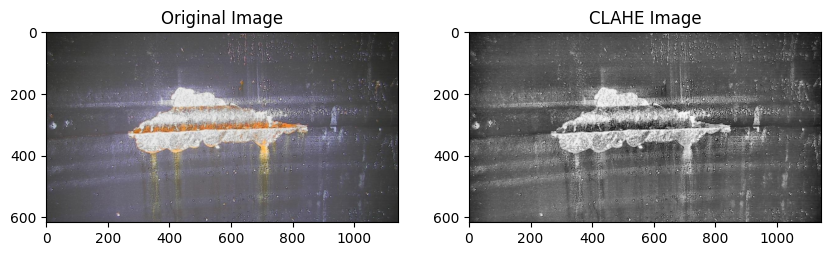

In [ ]:
# Load the image
img_path = 'images/img2.jpg'
img = cv2.imread(img_path)

# Convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_img = clahe.apply(gray_img)

# Display the original and CLAHE images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.set_title("Original Image")

ax2.imshow(clahe_img, cmap='gray')
ax2.set_title("CLAHE Image")

plt.show()


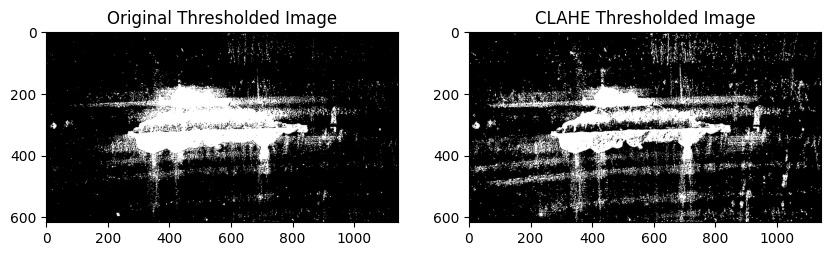

In [ ]:
#Apply threshold  to visualize Original threshold vs CLAHE threshold
ret, thresh = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(clahe_img, 127, 255, cv2.THRESH_BINARY)

# Display the original and CLAHE images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(thresh, cmap='gray')
ax1.set_title("Original Thresholded Image")

ax2.imshow(thresh2, cmap='gray')
ax2.set_title("CLAHE Thresholded Image")

plt.show()

### Inpainting

Inpainting is an image processing technique that involves reconstructing lost or damaged parts of an image by filling in the missing pixels using the surrounding pixels as a reference. It is useful for repairing old or damaged images, removing unwanted objects or artifacts from images, and restoring images from incomplete data. Inpainting can be performed using various algorithms, such as diffusion-based methods, texture synthesis-based methods, and exemplar-based methods. It can help improve the quality and usefulness of images by restoring lost or damaged information and making images more visually appealing.

args:

1. img: This is the input image that needs to be inpainted.
2. mask: This is the binary mask that indicates the areas of the input image that need to be inpainted. The mask should have the same size as the input image and contain 255 (white) values for the pixels that need to be inpainted and 0 (black) values for the pixels that should be left unchanged.
3. 3: This is an optional parameter that specifies the radius of the circular neighborhood used for inpainting. In this case, a radius of 3 is used, which means that the algorithm will use a circular neighborhood of radius 3 pixels to estimate the missing values.
4. cv2.INPAINT_TELEA/ cv2.INPAINT_NS : This is an optional flag that specifies the algorithm used for inpainting. In this case, the INPAINT_TELEA algorithm is used, which is based on the Navier-Stokes equations and provides better results than other algorithms.


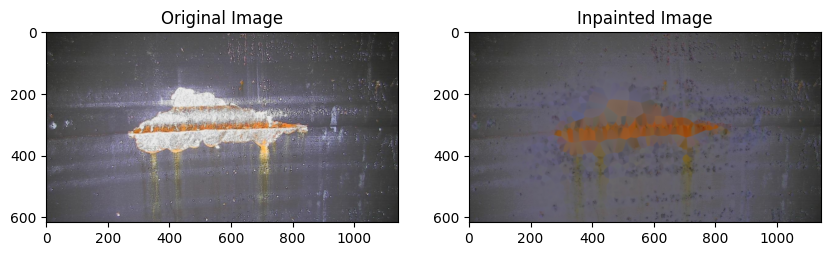

In [ ]:
# Load the image
img_path = 'images/img2.jpg'
img = cv2.imread(img_path)

# Convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)### Inpainting

# Apply inpainting
mask = cv2.threshold(gray_img, 100, 255, cv2.THRESH_BINARY)[1]
inpaint_img = cv2.inpaint(img, mask, 3, cv2.INPAINT_TELEA)

# Display the original and inpainted images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.set_title("Original Image")

ax2.imshow(cv2.cvtColor(inpaint_img, cv2.COLOR_BGR2RGB))
ax2.set_title("Inpainted Image")

plt.show()


### Sobel Edge Detection

Sobel edge detection is a method for detecting edges in images by computing the gradient magnitude and direction of an image using a Sobel filter. It is widely used in computer vision and image processing applications such as object detection, lane detection, image segmentation, image compression, and medical image analysis. Sobel edge detection works by identifying pixels with high gradient magnitude values, which correspond to edges in the image.

args:

1. gray_img: This is the input grayscale image on which the Sobel operation needs to be performed.
2. cv2.CV_64F: This is the data type of the output image. In this case, a 64-bit floating-point data type is used, which can represent both positive and negative gradient values accurately.
3. 1: This is an optional parameter that specifies the order of the derivative in the x direction. In this case, a value of 1 is used, which means that the Sobel operator will compute the first-order derivative in the x direction.
4. 0: This is an optional parameter that specifies the order of the derivative in the y direction. In this case, a value of 0 is used, which means that the Sobel operator will not compute the derivative in the y direction.
5. ksize=5: This is an optional parameter that specifies the size of the Sobel kernel used for the operation. In this case, a kernel size of 5 is used, which means that a 5x5 kernel will be used for the operation.

After computing the Sobel derivatives in the x and y directions using the cv2.Sobel function, the code computes the magnitude of the gradient using the np.sqrt function, which takes the square root of the sum of the squares of the gradient components

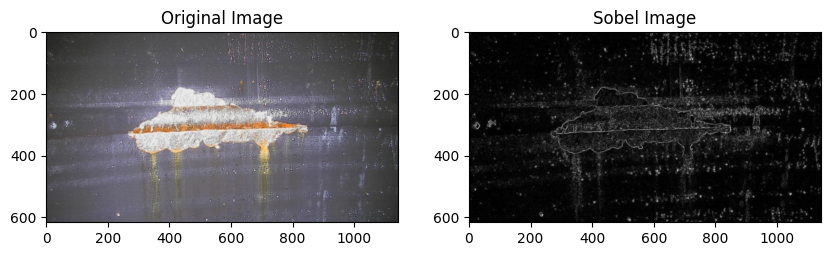

In [ ]:
# Load the image
img_path = 'images/img2.jpg'
img = cv2.imread(img_path)

# Convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Sobel edge detection
sobel_x = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(gray_img, cv2.CV_64F, 0, 1, ksize=5)
sobel_img = np.sqrt(sobel_x**2 + sobel_y**2)

# Display the original and Sobel images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.set_title("Original Image")

ax2.imshow(sobel_img, cmap='gray')
ax2.set_title("Sobel Image")

plt.show()

# Feature Extraction

### HOG.

Histogram of Oriented Gradients (HOG) is a feature extraction technique used in computer vision and image processing. It computes the local gradient orientations of an image and creates a histogram of those orientations. The histograms are then normalized to reduce the effect of variations in lighting and contrast. HOG is often used for object detection and recognition tasks, as it is able to capture shape and edge information in an image. Additionally, it is relatively simple and efficient to compute, making it a popular choice for real-time applications.

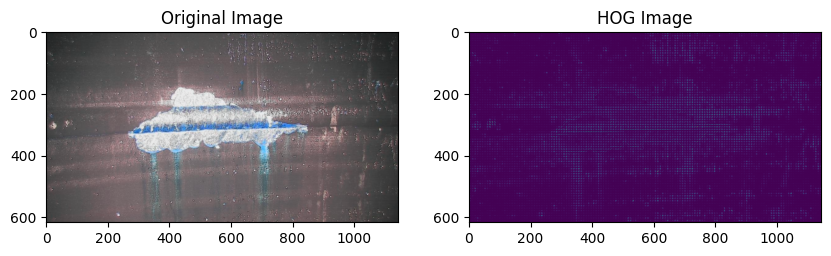

In [ ]:
# Load the image
img_path = 'images/img2.jpg'
img = cv2.imread(img_path)

# Compute HOG features
hog_feats, hog_img = skf.hog(img, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(1, 1), visualize=True, channel_axis= 2)

# Display the original and HOG images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(img)
ax1.set_title("Original Image")

ax2.imshow(hog_img)
ax2.set_title("HOG Image")

plt.show()

### ORB.

ORB (Oriented FAST and Rotated BRIEF) is a feature detection and description algorithm used in computer vision to identify and match features in images. ORB works by detecting and describing keypoints in an image, and then matching them to keypoints in another image to identify similarities or differences. It is robust to scale and rotation changes, making it ideal for use in object recognition and tracking applications.

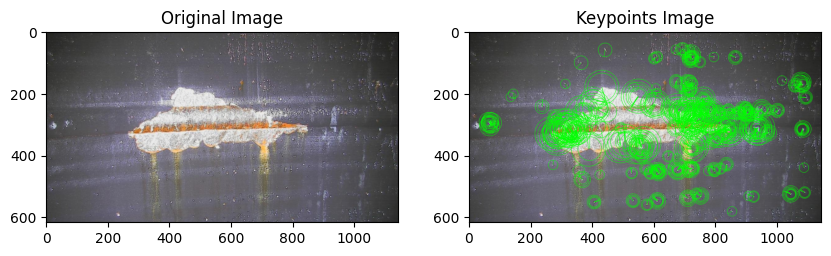

In [ ]:
# Convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Initialize the ORB feature detector
orb = cv2.ORB_create()

# Find keypoints and descriptors
keypoints, descriptors = orb.detectAndCompute(gray_img, None)

# Draw keypoints on the image
img_keypoints = cv2.drawKeypoints(img, keypoints, None, color=(0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the original and keypoints image
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.set_title("Original Image")

ax2.imshow(cv2.cvtColor(img_keypoints, cv2.COLOR_BGR2RGB))
ax2.set_title("Keypoints Image")

plt.show()

### BRISK

BRISK (Binary Robust Invariant Scalable Keypoints) is a feature detection algorithm that finds points of interest in an image that are robust to changes in lighting, rotation, and scale. It uses a binary descriptor, which makes it fast and efficient, and is able to detect features with varying scales and orientations. The main advantages of BRISK are its speed and efficiency, making it suitable for real-time applications such as robotics and augmented reality.

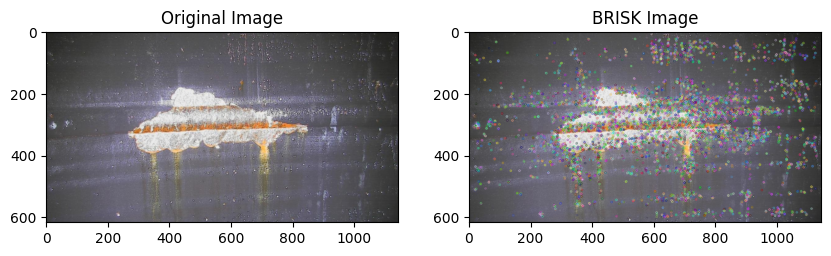

In [ ]:
# Convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Initialize the BRISK feature detector
brisk = cv2.BRISK_create()

# Find keypoints and descriptors
keypoints, descriptors = brisk.detectAndCompute(gray_img, None)

# Draw the keypoints on the original image
img_with_keypoints = cv2.drawKeypoints(img, keypoints, None)

# Display the original and BRISK images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.set_title("Original Image")

ax2.imshow(cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB))
ax2.set_title("BRISK Image")

plt.show()

## Image Segmentation

### K-means

K-means is a clustering algorithm that aims to partition n observations into k clusters. The algorithm works by iteratively assigning each observation to a cluster and then updating the cluster centroid based on the new assignments. The process continues until the assignment of observations to clusters no longer changes.

The main advantages of k-means include its simplicity, speed, and scalability. K-means can handle large datasets and is often used in real-world applications such as image segmentation, document clustering, and market segmentation.

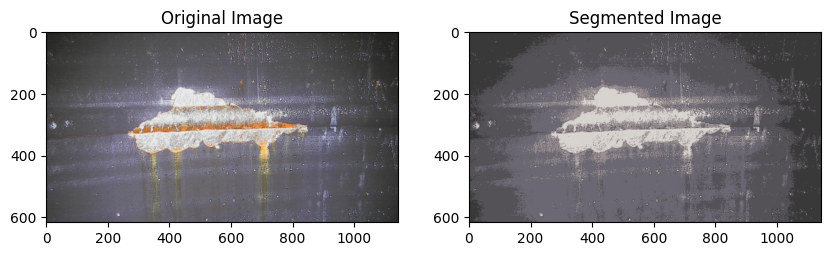

In [ ]:
# Load the image
img_path = 'images/img2.jpg'
img = cv2.imread(img_path)

# Reshape the image into a 2D array of pixels
pixel_vals = img.reshape((-1,3))

# Convert the pixel values to float32
pixel_vals = np.float32(pixel_vals)

# Set the criteria for the k-means algorithm
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

# Set the number of clusters (k)
k = 5

# Run the k-means algorithm
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert the centers to uint8
centers = np.uint8(centers)

# Reshape the labels back into the original image shape
segmented_data = centers[labels.flatten()]

segmented_image = segmented_data.reshape(img.shape)

# Display the original and segmented images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.set_title("Original Image")

ax2.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
ax2.set_title("Segmented Image")

plt.show()

### Watershed algorithm

Sure, the watershed algorithm is a method in image processing used to segment an image into different regions or objects. This algorithm is based on the idea of considering the image as a topographic map, where the high intensity pixels are the peaks and the low intensity pixels are the valleys. The algorithm starts by flooding the valleys with water and the water is stopped when it meets at the peaks. The points at which the water stops form the boundaries of the segmented regions. The main advantage of the watershed algorithm is that it can segment objects that are touching or overlapping, which can be difficult to achieve with other segmentation methods.

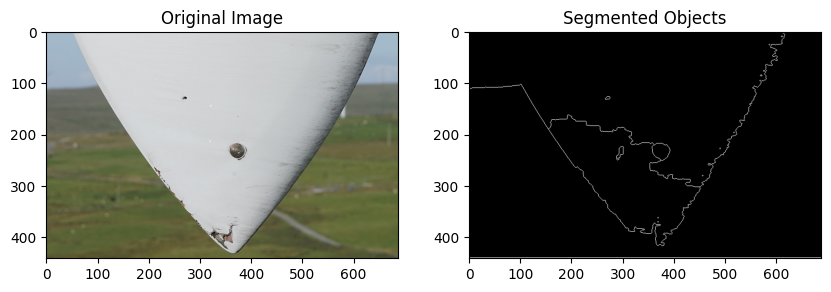

In [ ]:
# Load the image
img_path = 'images/img1.jpg'
img = cv2.imread(img_path)

# Convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply thresholding to create a binary image
ret, thresh_img = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Perform morphological operations to clean up the image
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh_img, cv2.MORPH_OPEN, kernel, iterations=2)

# Perform segmentation using the distance transform and watershed algorithm
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.5*dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(opening, sure_fg)
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown==255] = 0
markers = cv2.watershed(img, markers)

# Create a mask for the segmented objects
mask = np.zeros(img.shape[:2], np.uint8)
mask[markers==-1] = 255

# Display the original image and the segmented objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.set_title("Original Image")

ax2.imshow(mask, cmap='gray')
ax2.set_title("Segmented Objects")

plt.show()